##  조이름: 1조
   - 팀 주제: 국내 장애인의 현황과 복지 현황
   - 개인 주제: 국내 장애인 ‘고용’의 현황과 관련 복지 현황
### - 자료 출처
   - 1. 전체 장애인 고용 현황: https://www.data.go.kr/data/15028087/fileData.do
   - 2. 장애인 고용 의무현황: https://www.data.go.kr/data/15014785/fileData.do
   - 3~5번: https://kosis.kr/statisticsList/statisticsListIndex.do?vwcd=MT_ZTITLE&menuId=M_01_01#content-group

## <데이터베이스>

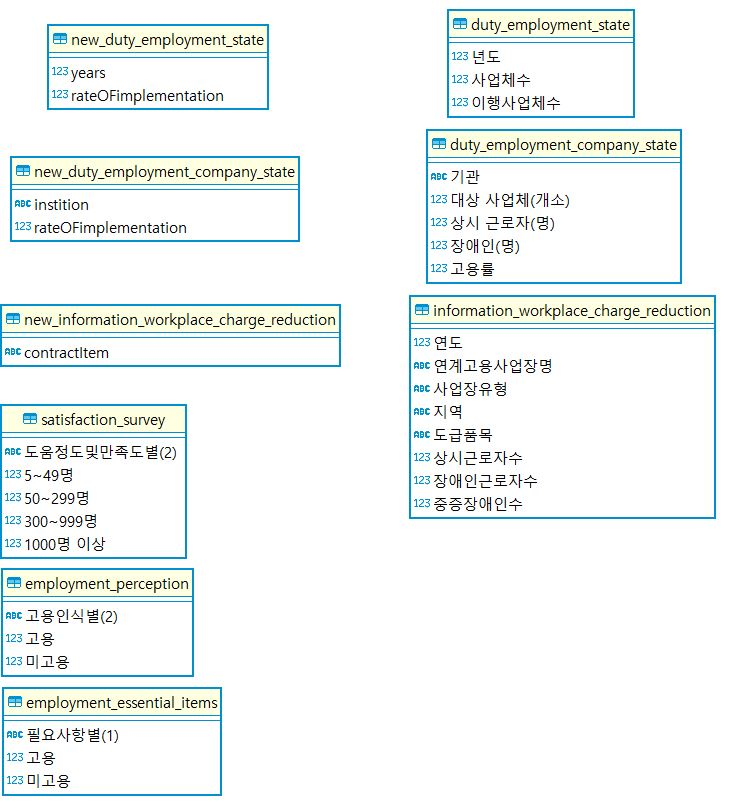

## 1. 2010년~2020년까지 장애인 고용 이행률

In [315]:
# 모듈 설정
import pymysql
import matplotlib.pyplot as plt
import platform
import pandas as pd
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

In [350]:
def draw_graph(year,rate): # 그래프 그리는 함수
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
            
    plt.figure(figsize=(15,7))
    plt.style.use('ggplot')
    plt.title('2010~2020년 장애인 고용 이행률 추이',size=17)
    plt.plot(year,rate,'tomato',marker='o',label='고용 이행률')
    plt.xlabel('연도',size=15)
    plt.ylabel('이행률',size=15)
    plt.xticks(size=13)
    plt.yticks(size=13)
    plt.legend()
    plt.show()

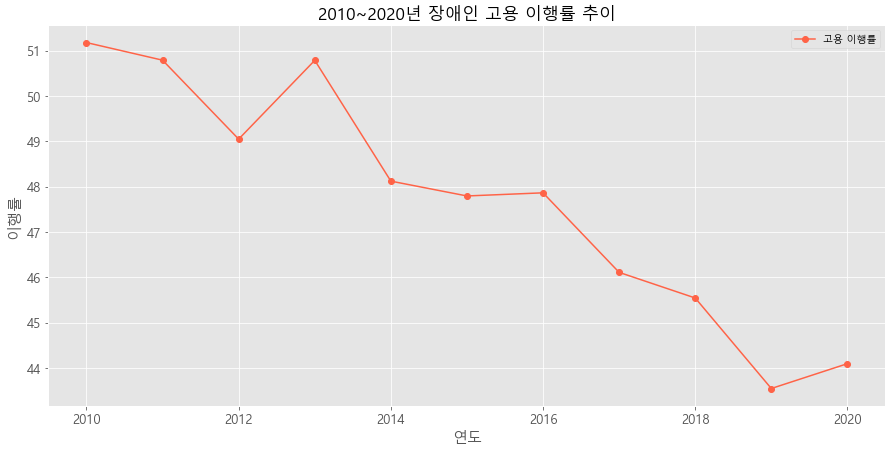

In [351]:
conn=pymysql.connect(host='localhost', user='root', password='0813', db='project6', charset='utf8')
cur=conn.cursor()
cur.execute('select * from new_duty_employment_state')
rows=cur.fetchall()

year_list=[]
rate_list=[]

for row in rows:
    year_list.append(row[0]) # 연도
    rate_list.append(row[1]) # 이행률
    
draw_graph(year_list,rate_list)

cur.close()
conn.close()

- <b><span style='color:tomato'> 장애인 고용률 하락 추세   </span></b>

## 2. 2021년 장애인 의무고용률과 기관별 비교

In [387]:
def draw_graph_bar(data,rate): # 그래프 그리는 함수   
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
 
    plt.rcParams["figure.figsize"]=(15,7)
    data.plot(kind='bar',color='skyblue')
    plt.style.use('ggplot')
    plt.plot(rate,'r--',label='의무고용률')
    if 3.4 in rate: plt.text(12.1,3.3,'의무고용률 3.4%',size=13) # 정부/공공기업
    elif 3.1 in rate: plt.text(3.7,2.9,'의무고용률 3.1%',size=13) # 민간기업
    plt.title('2021년 기관별 장애인 고용률',size=17)
    plt.xlabel('기관',size=15)
    plt.ylabel('고용률',size=15)
    plt.xticks(rotation=80,size=13)
    plt.yticks(size=13)
    plt.legend()
    plt.show()

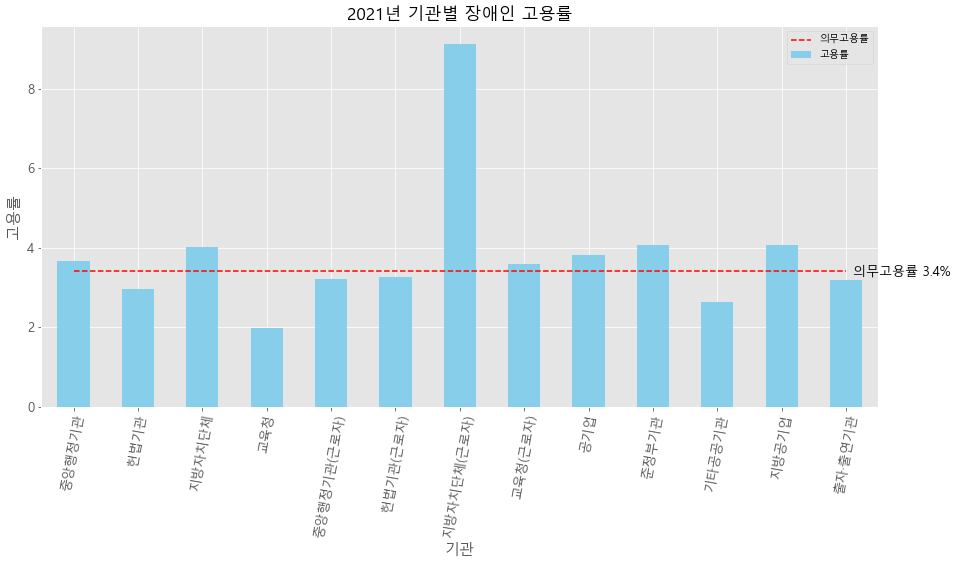

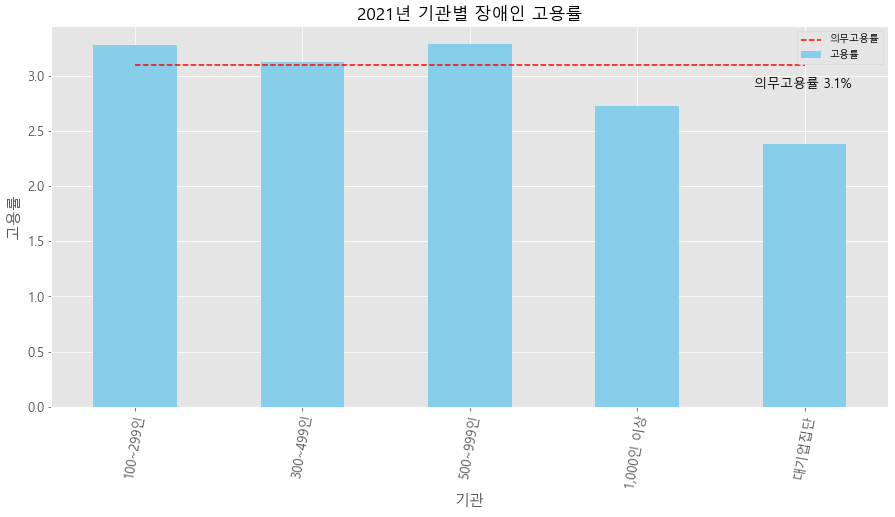

In [388]:
conn=pymysql.connect(host='localhost', user='root', password='0813', db='project6', charset='utf8')
cur=conn.cursor()
cur.execute('select * from new_duty_employment_company_state')
rows=cur.fetchall()

DF1=pd.DataFrame(rows)
DF1=DF1.set_index(0)
DF1.columns=['고용률']
duty_rate1=[]
duty_rate2=[]

while True:
    if len(DF1[:13])==len(duty_rate1): break 
    else: duty_rate1.append(3.4) # 2021년 정부 및 공공기관 장애인 의무고용률
    
while True:
    if len(DF1[14:])==len(duty_rate2): break
    else: duty_rate2.append(3.1) # 2021년 민간기업 장애인 의무고용률
    
draw_graph_bar(DF1[:13],duty_rate1)
draw_graph_bar(DF1[14:],duty_rate2)

cur.close()
conn.close()

- <b><span style='color:blue'> 대부분 의무고용 이행 미비   </span></b>
- <b><span style='color:blue'> 대기업 장애인 고용률 불명예   </span></b>
    - 의무고용 이행비율 2.38%로 33개 대기업 중 제대로 이행한 기업은 4곳뿐
    - <b>삼성전자</b>, 고용부담금액 214억, 5년간 748억원 ‘1위’
    - 부담금으로 납부하려는 경향

## 3. 2020년 장애인고용 기업별 만족도

In [352]:
def draw_graph_survey(data): # 그래프 그리는 함수
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
            
    plt.figure(figsize=(15,7))
    plt.title('2020년 장애인고용 기업별 만족도',size=17)
    plt.style.use('ggplot')
    plt.plot(data.index,data[1].values,'r',marker='s',label='5~49명')
    plt.plot(data[2].values,'orange',marker='s',label='50~299명')
    plt.plot(data[3].values,'g',marker='s',label='300~999명')
    plt.plot(data[4].values,'m',marker='s',label='1000명 이상')
    plt.ylim(3,4)
    plt.xlabel('항목',size=15)
    plt.ylabel('점수',size=15)
    plt.xticks(rotation=80,size=13)
    plt.yticks(size=13)
    plt.legend(fontsize=12.5,loc=(0.84, 0.1))
    plt.show()

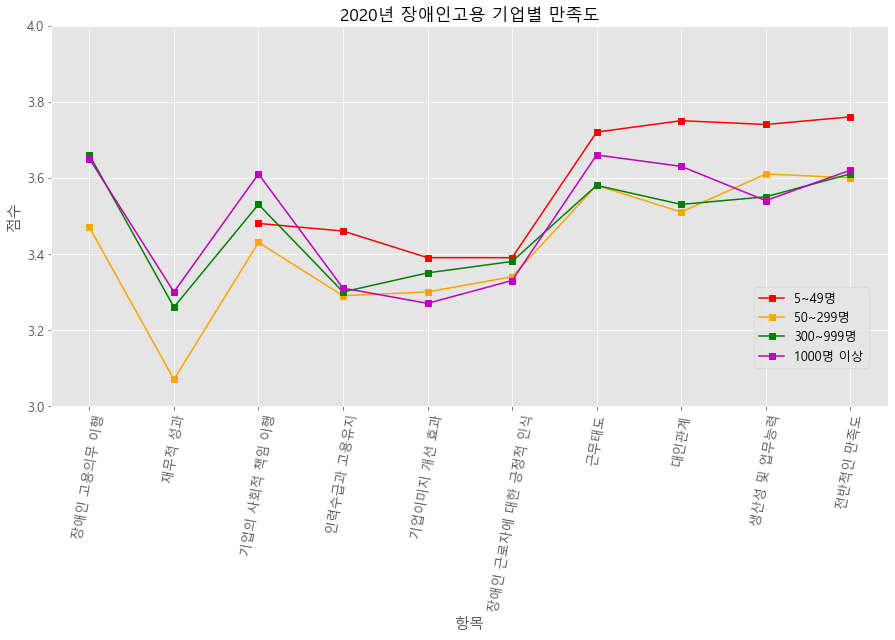

In [353]:
conn=pymysql.connect(host='localhost', user='root', password='0813', db='project6', charset='utf8')
cur=conn.cursor()

cur.execute('select * from satisfaction_survey')
rows=cur.fetchall()
        
DF2=pd.DataFrame(rows)
DF2=DF2.set_index(0)
DF2
draw_graph_survey(DF2)

cur.close()
conn.close()

- <b><span style='color:#FF00FF'> 만족도 평균   </span></b>  
    - but, 재무적 성과 부족

## 4. 2020년 장애인고용에 대한 고용/미고용 기업 인식

In [354]:
def draw_graph_perception(data): # 그래프 그리는 함수
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
            
    plt.figure(figsize=(15,7))
    plt.style.use('ggplot')
    plt.title('2020년 장애인고용에 대한 고용/미고용 기업 인식',size=17)
    plt.plot(data.index,data['고용'].values,color='#006666',marker='o',label='고용')
    plt.plot(data['미고용'].values,color='#CC0066',marker='o',label='미고용')
    plt.xlabel('항목',size=15)
    plt.ylabel('점수',size=15)
    plt.xticks(rotation=80,size=13)
    plt.yticks(size=13)
    plt.legend()
    plt.show()

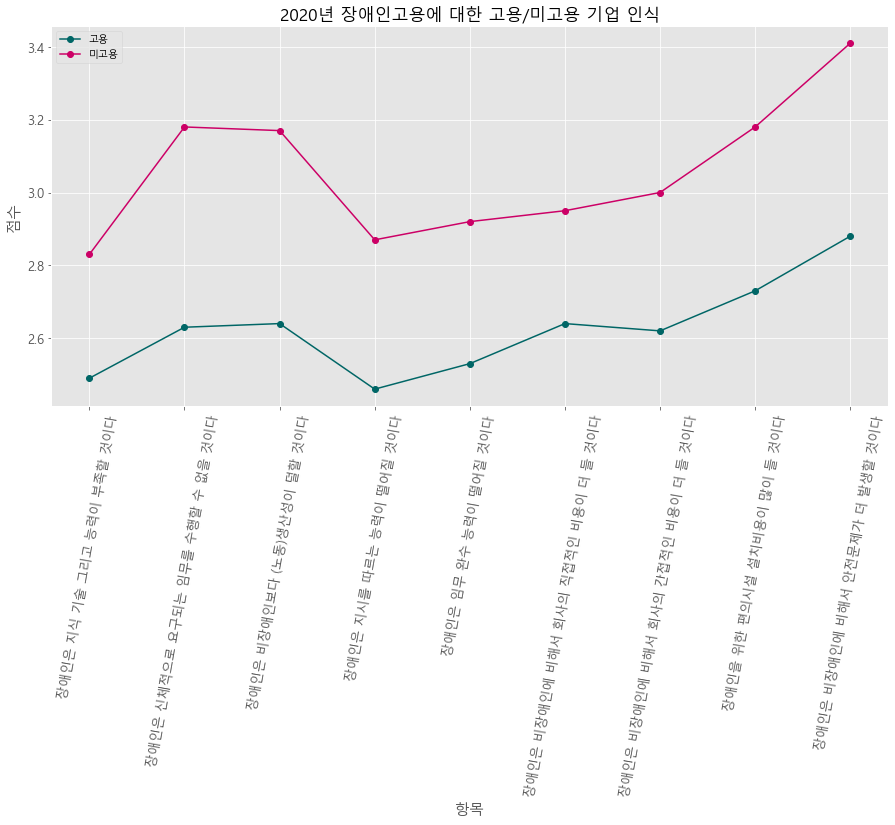

In [355]:
conn=pymysql.connect(host='localhost', user='root', password='0813', db='project6', charset='utf8')
cur=conn.cursor()

cur.execute('select * from employment_perception')
rows=cur.fetchall()
        
DF3=pd.DataFrame(rows)
DF3=DF3.set_index(0)
DF3.columns=['고용','미고용']

draw_graph_perception(DF3)

cur.close()
conn.close()

- <b><span style='color:#006666'> 안정성 문제   </span></b>
- <b><span style='color:#006666'> 미고용 기업 부정적 인식 高   </span></b>

## 5. 2020년 장애인 고용 증진을 위해  고용/미고용 필요한 사항

In [378]:
def draw_pie(data):
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
        
    fig, axes=plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)
    plt.subplot(1,2,1)
    plt.title('2020년 장애인 고용 증진을 위해 필요한 사항-고용',size=20)
    textprops={'size':17}
    plt.pie(data['고용'],labels=data.index,autopct='%.1f%%',textprops=textprops,startangle=90)
    plt.subplot(1,2,2)
    plt.title('2020년 장애인 고용 증진을 위해 필요한 사항-미고용',size=20)
    plt.pie(data['미고용'],labels=data.index,autopct='%.1f%%',textprops=textprops,startangle=90)
    plt.show()

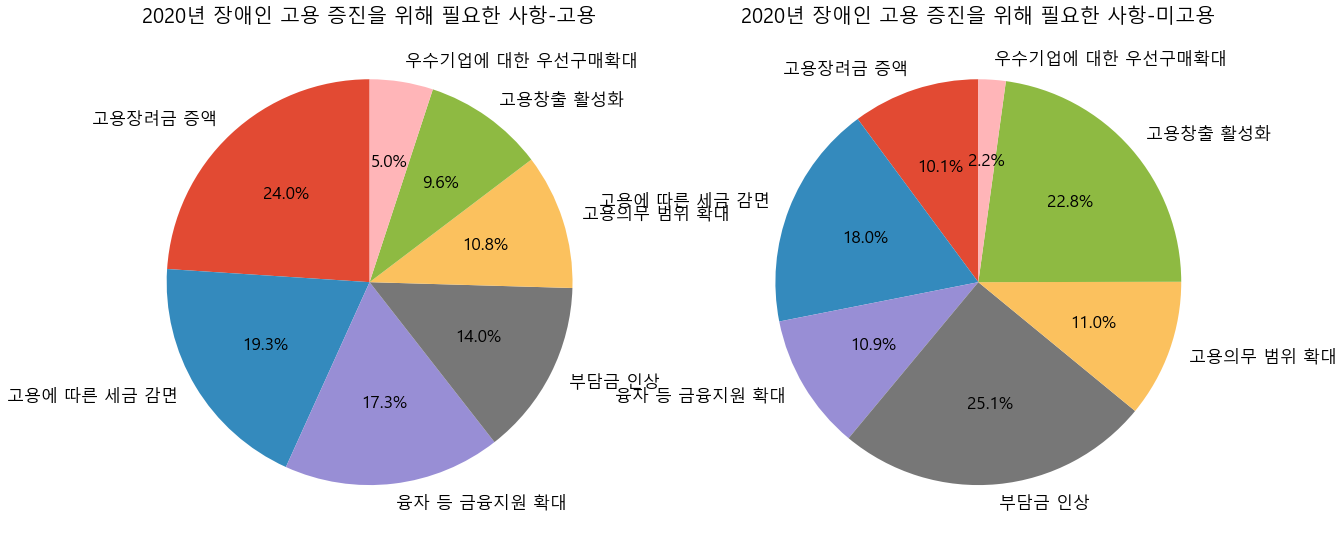

In [379]:
conn=pymysql.connect(host='localhost', user='root', password='0813', db='project6', charset='utf8')
cur=conn.cursor()

cur.execute('select * from employment_essential_items')
rows=cur.fetchall()
        
DF4=pd.DataFrame(rows)
DF4=DF4.set_index(0)
DF4.columns=['고용','미고용']
DF4=DF4.iloc[:7].sort_values(by=DF4.columns[0],ascending=False) # 복잡해서 임의로 슬라이싱

draw_pie(DF4)

cur.close()
conn.close()

- 주요 키워드는? <b><span style='color:#980000'>돈.돈.돈</b>

## <b>[결론]</b>
   - 기업 내의 <b>인식</b> 개선
   - <b>1차원적 해결 방안</b>: 고용부담금, 고용장려금(2022년 NEW! 신규고용장려금)

### (번외) 장애인고용 연계고용사업장 도급품목

In [380]:
def draw_wordcloud(data):
    okt=Okt()
    sentences_tag=[]
    not_list=['외','및','등','업','용','류'] # 의미 없다고 생각하는 단어 제거 리스트
    
    # 형태소 구분하여 리스트에 넣기
    for sentence in data:
        morph=okt.pos(sentence)
        sentences_tag.append(morph)

    noun_adj_list=[]
    # 명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if (tag in ['Noun']) and (word not in not_list):
                    if word in ['세탁물','인쇄물']: noun_adj_list.append(word[:2]) # 같은 키워드라 분리되는 거 방지하려고
                    else: noun_adj_list.append(word)
            
    # 형태소별 count
    counts=Counter(noun_adj_list)
    tags=counts.most_common(30)
    
    # wordCloud생성
    # 한글 깨지는 문제 해결하기위해 font_path 지정
    if platform.system()=='Windows':
        path=r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()=='Darwin':  # Mac OS
        path=r'/System/Library/Fonts/AppleGothic'
    else:
        path=r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc=WordCloud(font_path=path, background_color='white', width=800, height=600)
    print(dict(tags))
    
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
        
    cloud=wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


{'세탁': 41, '인쇄': 16, '용역': 9, '서비스': 8, '가공': 6, '원두': 6, '커피': 6, '복사': 5, '관리': 5, '화장지': 5, '산업': 5, '처리': 5, '제조': 4, '부품': 4, '전자부품': 4, '화장': 4, '지류': 4, '용지': 3, '종이컵': 3, '위생': 3, '제빵': 3, '마스크': 3, '포장': 3, '소독': 3, '의료': 3, '곡물': 3, '명함': 3, '자동차': 3, '물': 3, '유니폼': 3}


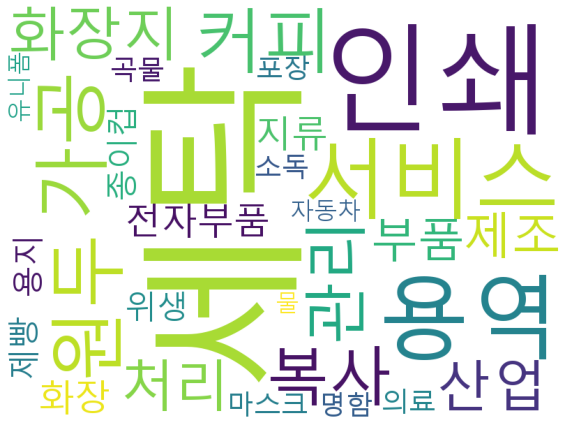

In [369]:
conn=pymysql.connect(host='localhost', user='root', password='0813', db='project6', charset='utf8')
cur=conn.cursor()

cur.execute('select * from new_information_workplace_charge_reduction')
rows=cur.fetchall()
data_list=[]

for row in rows:
    data_list.append(row[0])
    
draw_wordcloud(data_list)

cur.close()
conn.close()

- <b><span style='color:#66CC00'>비교적 간단한 업무</b>